<a href="https://colab.research.google.com/github/zayneb-n/Employee-evaluation-model/blob/master/Employee_evaluation_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let's build a model that will predict if an employee is eligible for promotion or not based on the stored data.
We will use the AutoML process in this project.

In [5]:
!pip install evalml

In [6]:
import evalml

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
file_path = '/content/drive/My Drive/Colab Notebooks/employee_promotion.csv'  # Replace with the actual path to your CSV file
df = pd.read_csv(file_path)

In [10]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    52248 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB


In [12]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,52248.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.712238,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.521910,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,77.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


Data analysis and pre-processing

In [13]:
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won                 0
avg_training_score      2560
is_promoted                0
dtype: int64

In [14]:
df.dropna(axis=0, inplace=True)
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0


In [15]:
df.drop(columns=['employee_id'], inplace=True)
df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0


Deviding Features

In [16]:
num_features=[i for i in df.columns if df.dtypes[i]!='object']
num_features

['no_of_trainings',
 'age',
 'previous_year_rating',
 'length_of_service',
 'awards_won',
 'avg_training_score',
 'is_promoted']

In [17]:
cat_features=[i for i in df.columns if df.dtypes[i]=='object']
df[cat_features].nunique()

department              9
region                 34
education               3
gender                  2
recruitment_channel     3
dtype: int64

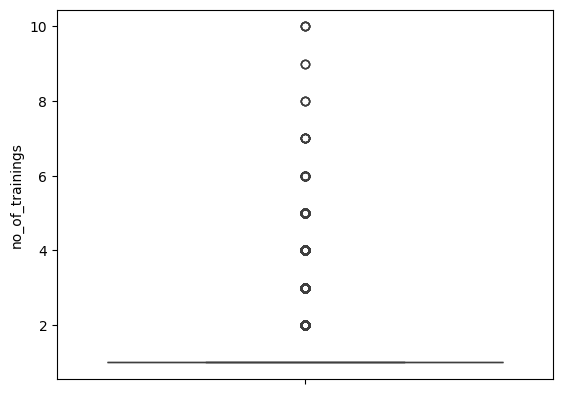

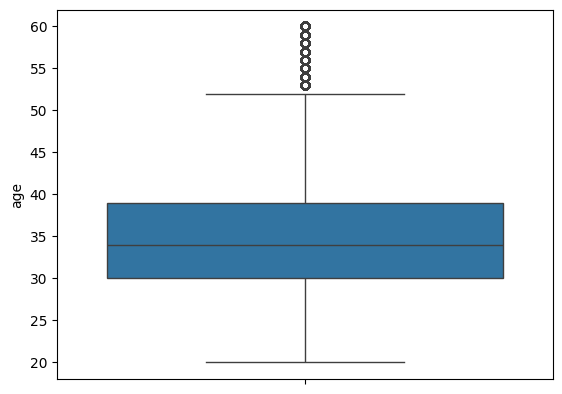

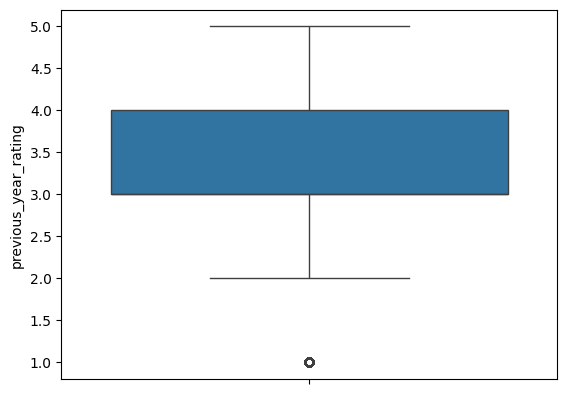

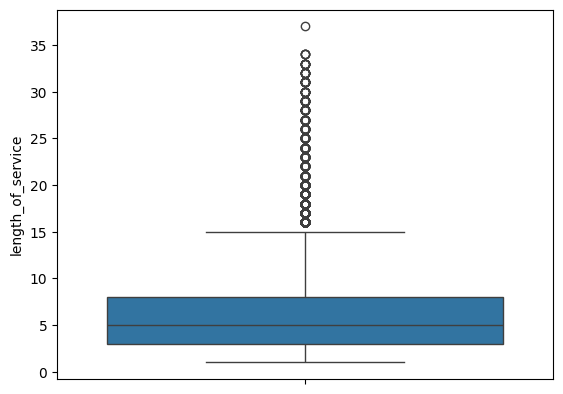

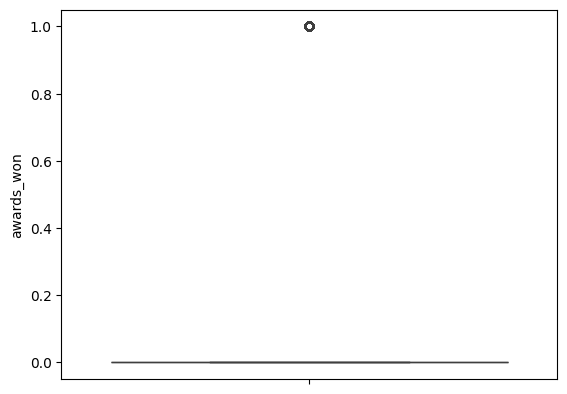

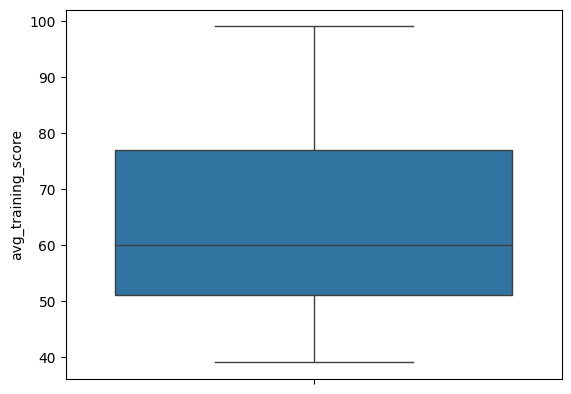

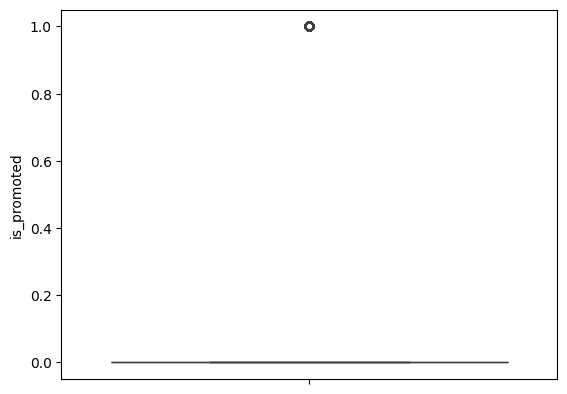

In [18]:
for i in num_features:
    plt.figsize=(10,5)
    sns.boxplot(y=df[i])
    plt.show()

Spotting outliers in the features in the previous plots.

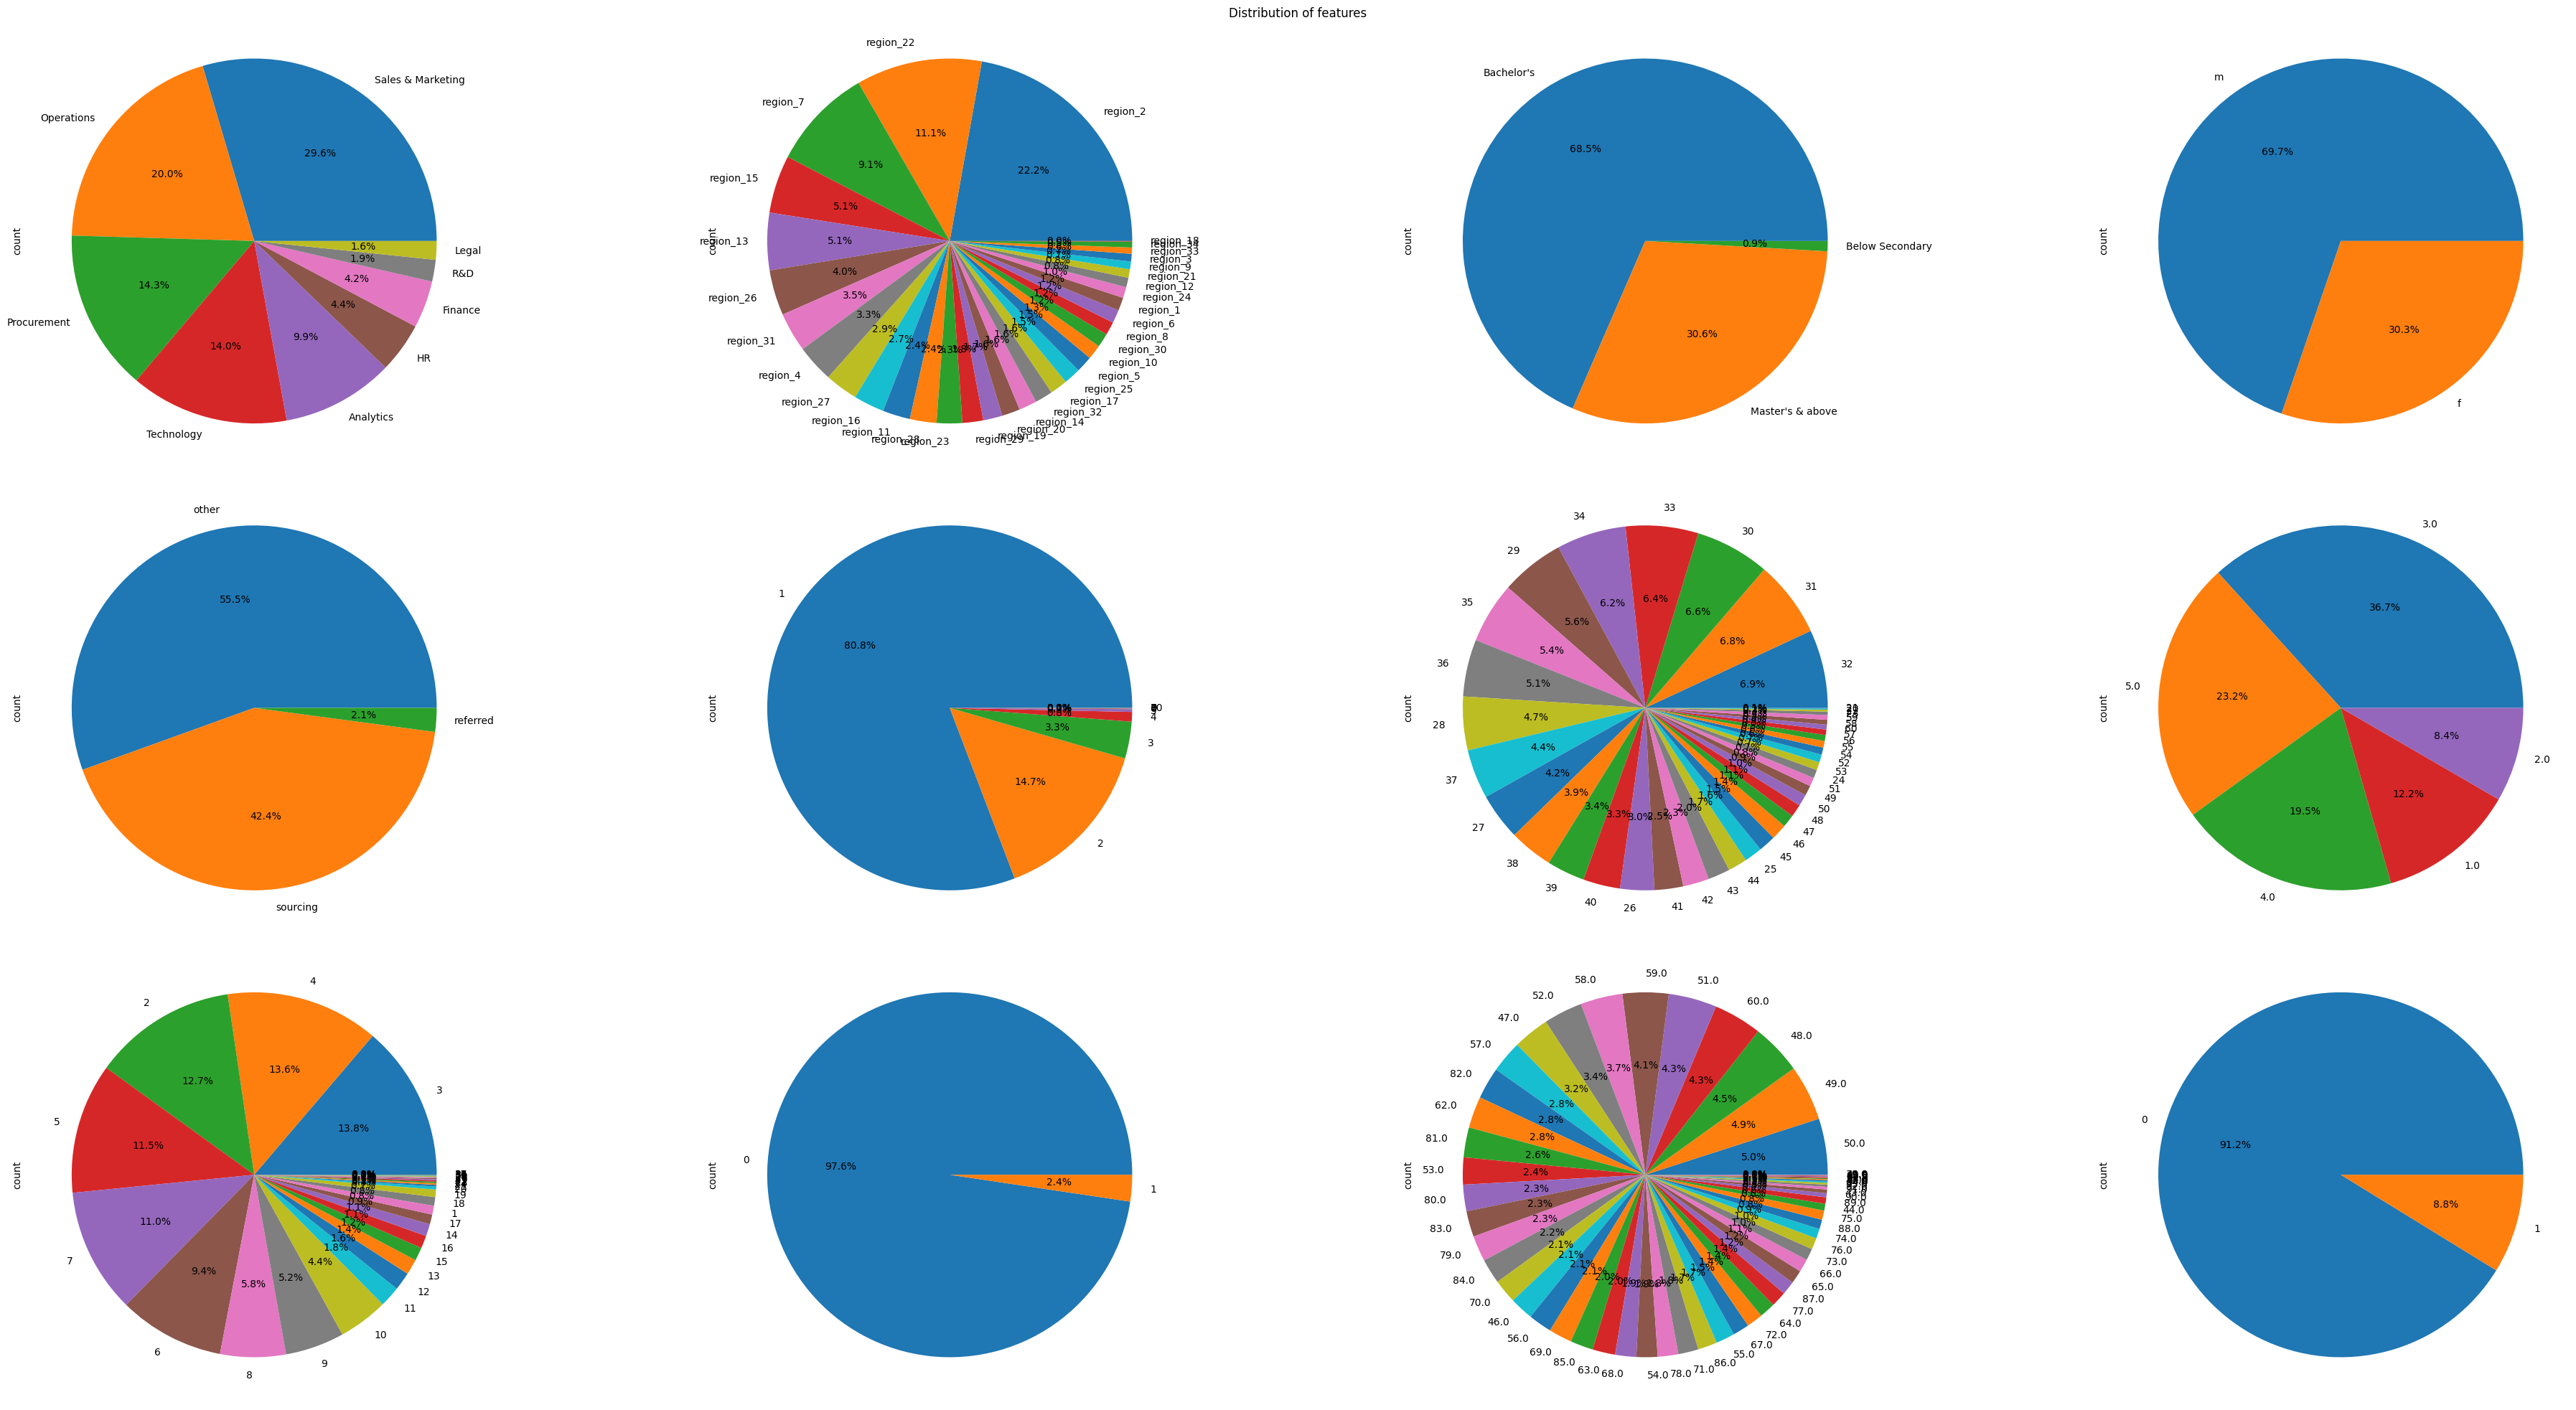

In [19]:
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(40, 20))

for i, feature in enumerate(df.columns):
    row = int(i/4)
    col = i%4
    pd.value_counts(df.iloc[:, i]).plot.pie(autopct="%.1f%%", ax=axs[row][col])

plt.suptitle('Distribution of features')
plt.tight_layout()

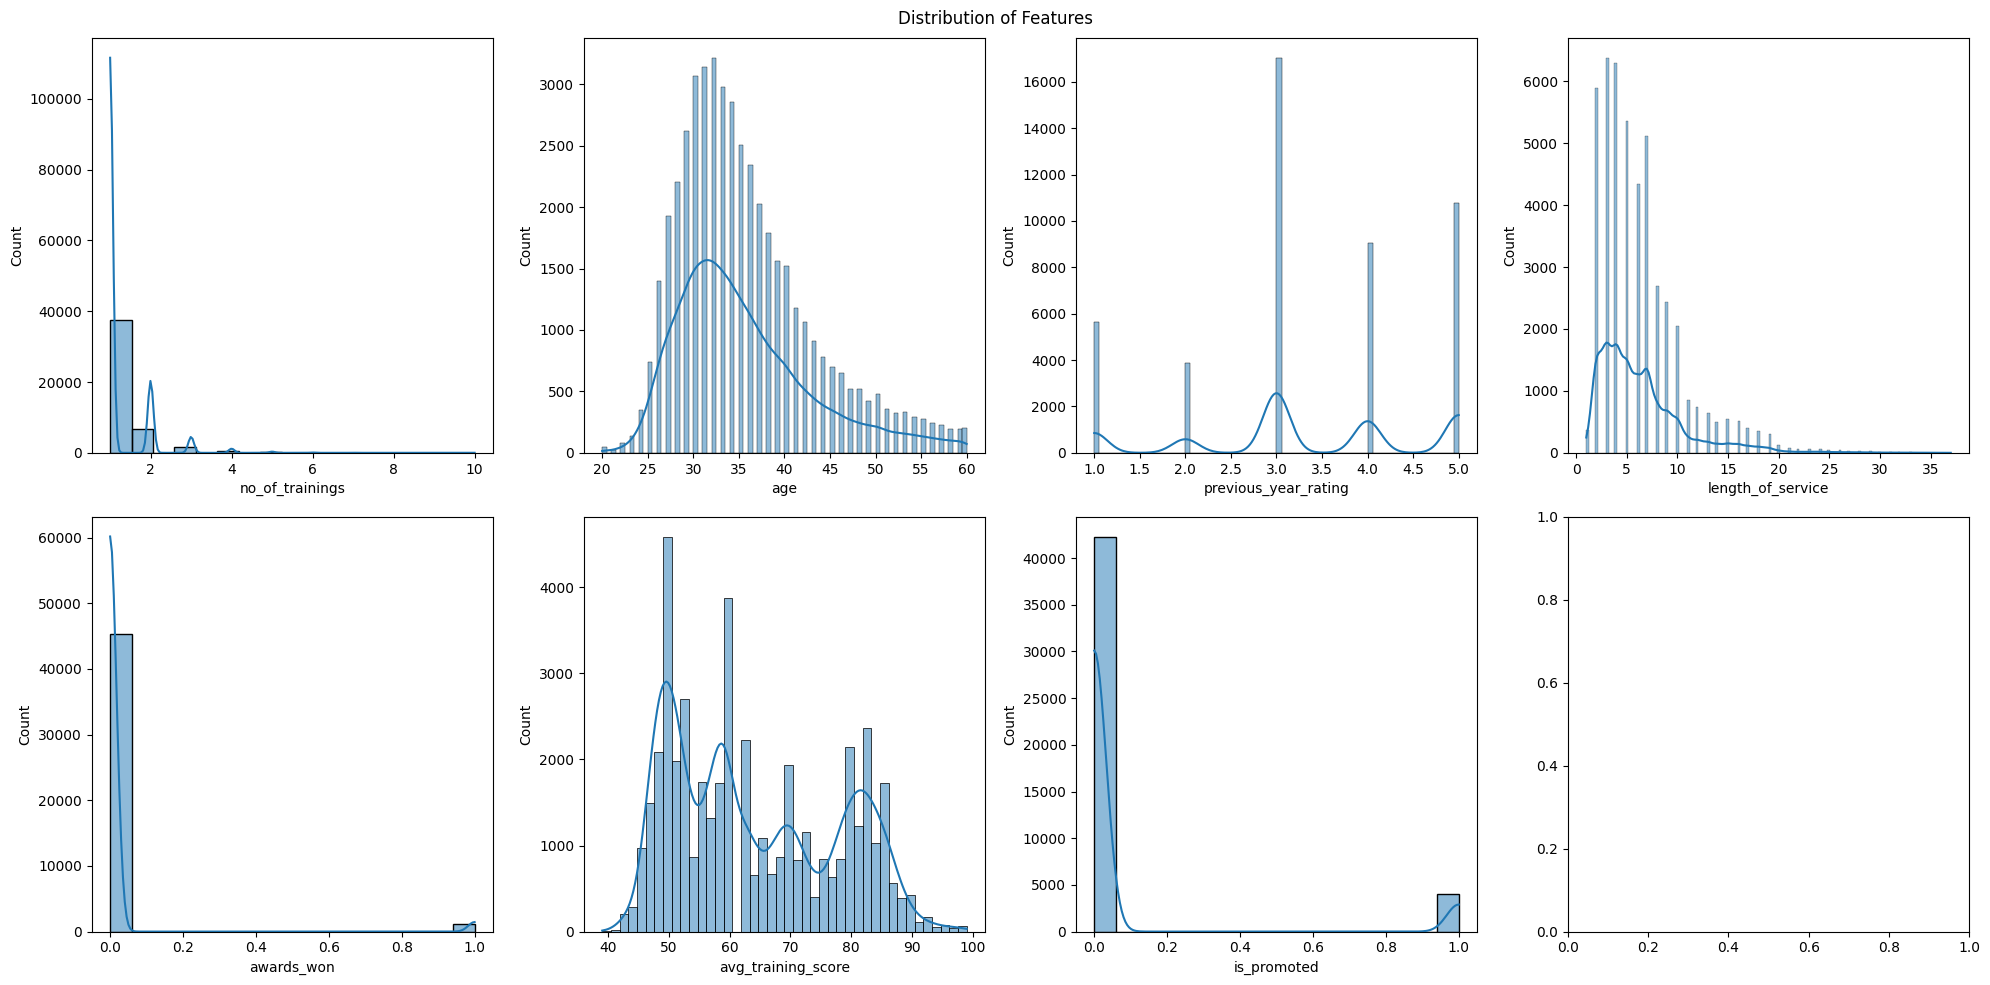

In [20]:
columns = ['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'awards_won', 'avg_training_score', 'is_promoted']

fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

for i, feature in enumerate(columns):
    row = int(i / 4)
    col = i % 4
    sns.histplot(df[feature], kde=True, ax=axs[row][col])

plt.suptitle('Distribution of Features')
plt.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)
plt.show()

Plotting Q-Q plots : By analyzing the resulting Q-Q plot, we can visually assess how closely the data follows a normal distribution. If the points fall approximately along the reference line, the data is close to normally distributed. Deviations from this line indicate departures from normality.

In [21]:
import scipy.stats as stat
import pylab

In [22]:
def plot_curve(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

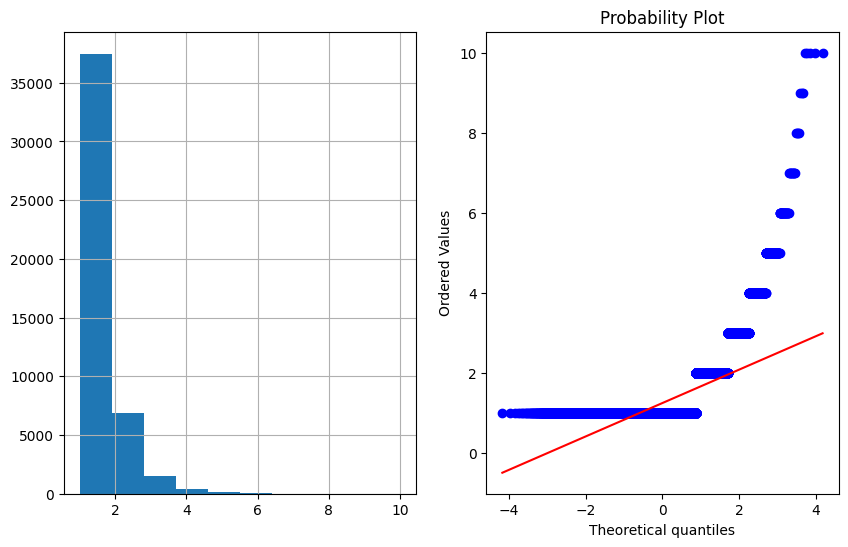

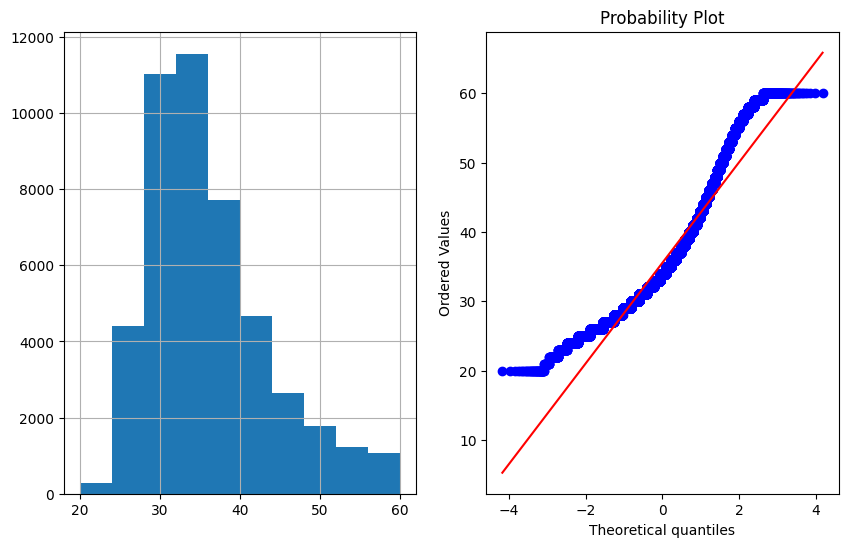

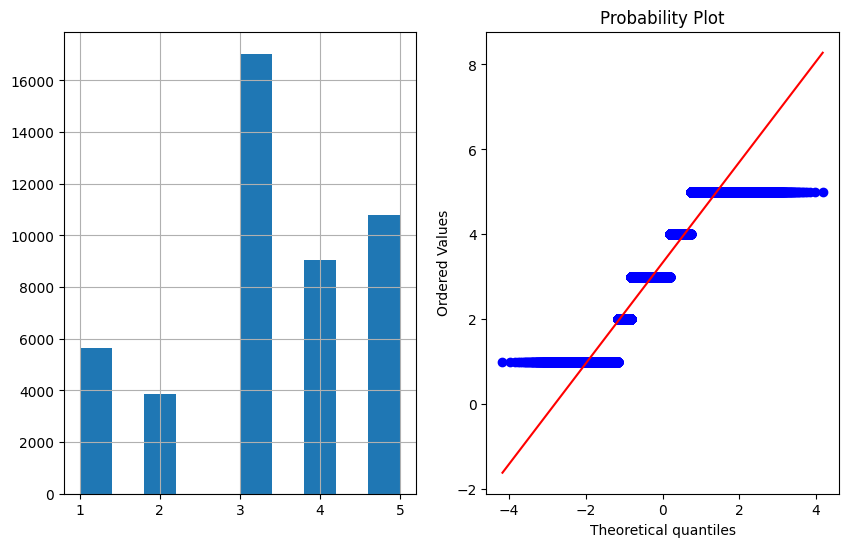

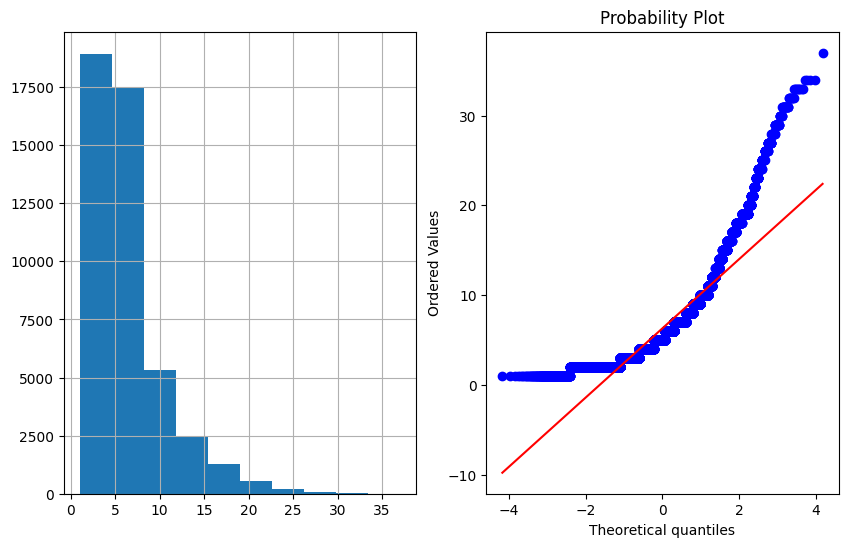

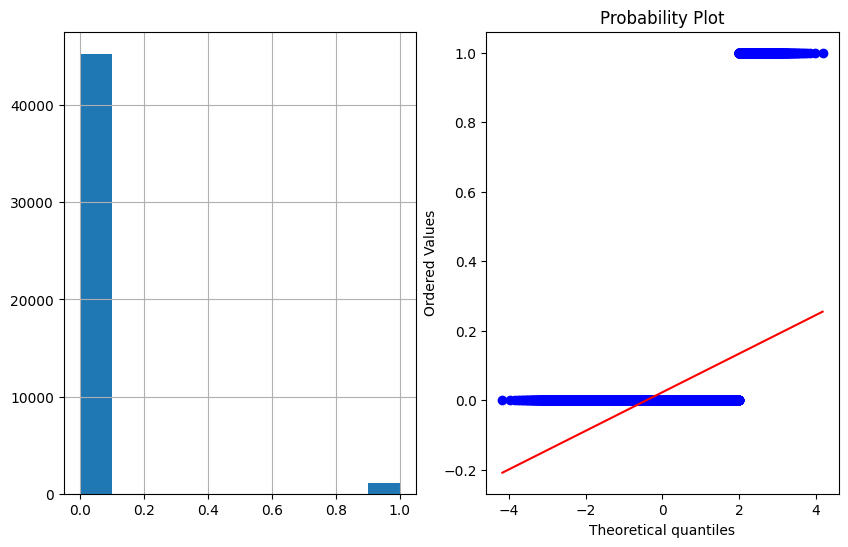

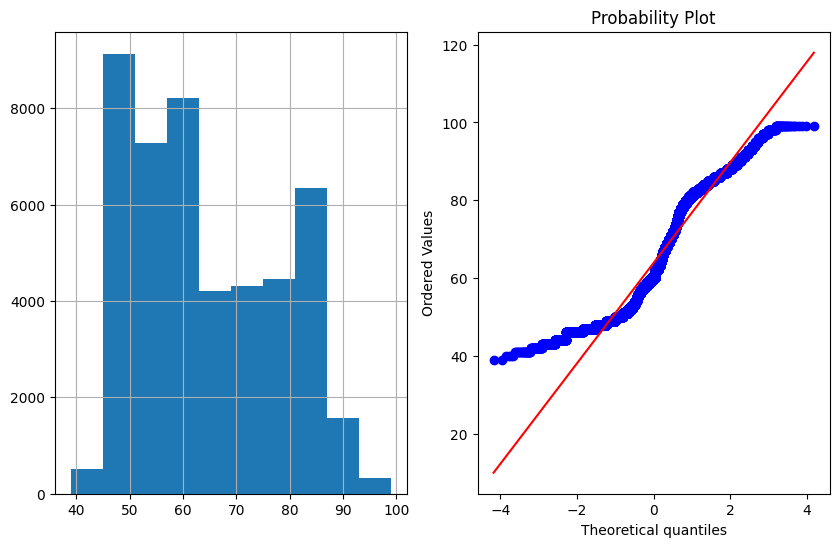

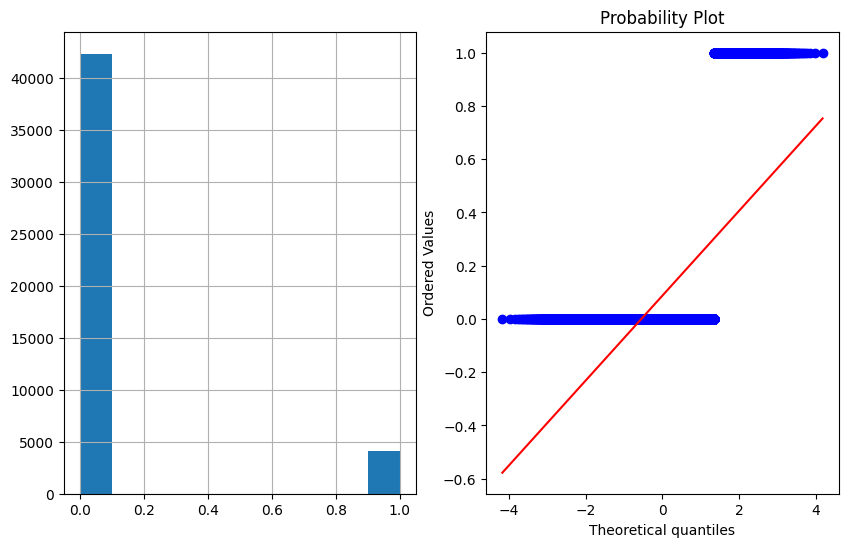

In [23]:
for feature in columns:
    plot_curve(df,feature)

We need to log transformation : transforming the columns using the natural logarithm and inserting the transformed columns into the DataFrame.
* np.log1p computes the natural logarithm of one plus the input array, i.e., log(1 + x). This is useful for transforming data that includes zero or small values, avoiding issues with taking the logarithm of zero.

In [24]:
age_log = np.log1p(df['age'])
service_log = np.log1p(df['length_of_service'])
score_log = np.log1p(df['avg_training_score'])

df.insert(6, 'age_log', age_log)
df.insert(9, 'length_of_service_log', service_log)
df.insert(12, 'avg_training_score_log', score_log)

df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age_log,age,previous_year_rating,length_of_service_log,length_of_service,awards_won,avg_training_score_log,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,3.583519,35,5.0,2.197225,8,0,3.912023,49.0,0
1,Operations,region_22,Bachelor's,m,other,1,3.433987,30,5.0,1.609438,4,0,4.110874,60.0,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,3.555348,34,3.0,2.079442,7,0,3.931826,50.0,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,3.688879,39,1.0,2.397895,10,0,3.931826,50.0,0
4,Technology,region_26,Bachelor's,m,other,1,3.828641,45,3.0,1.098612,2,0,4.304065,73.0,0


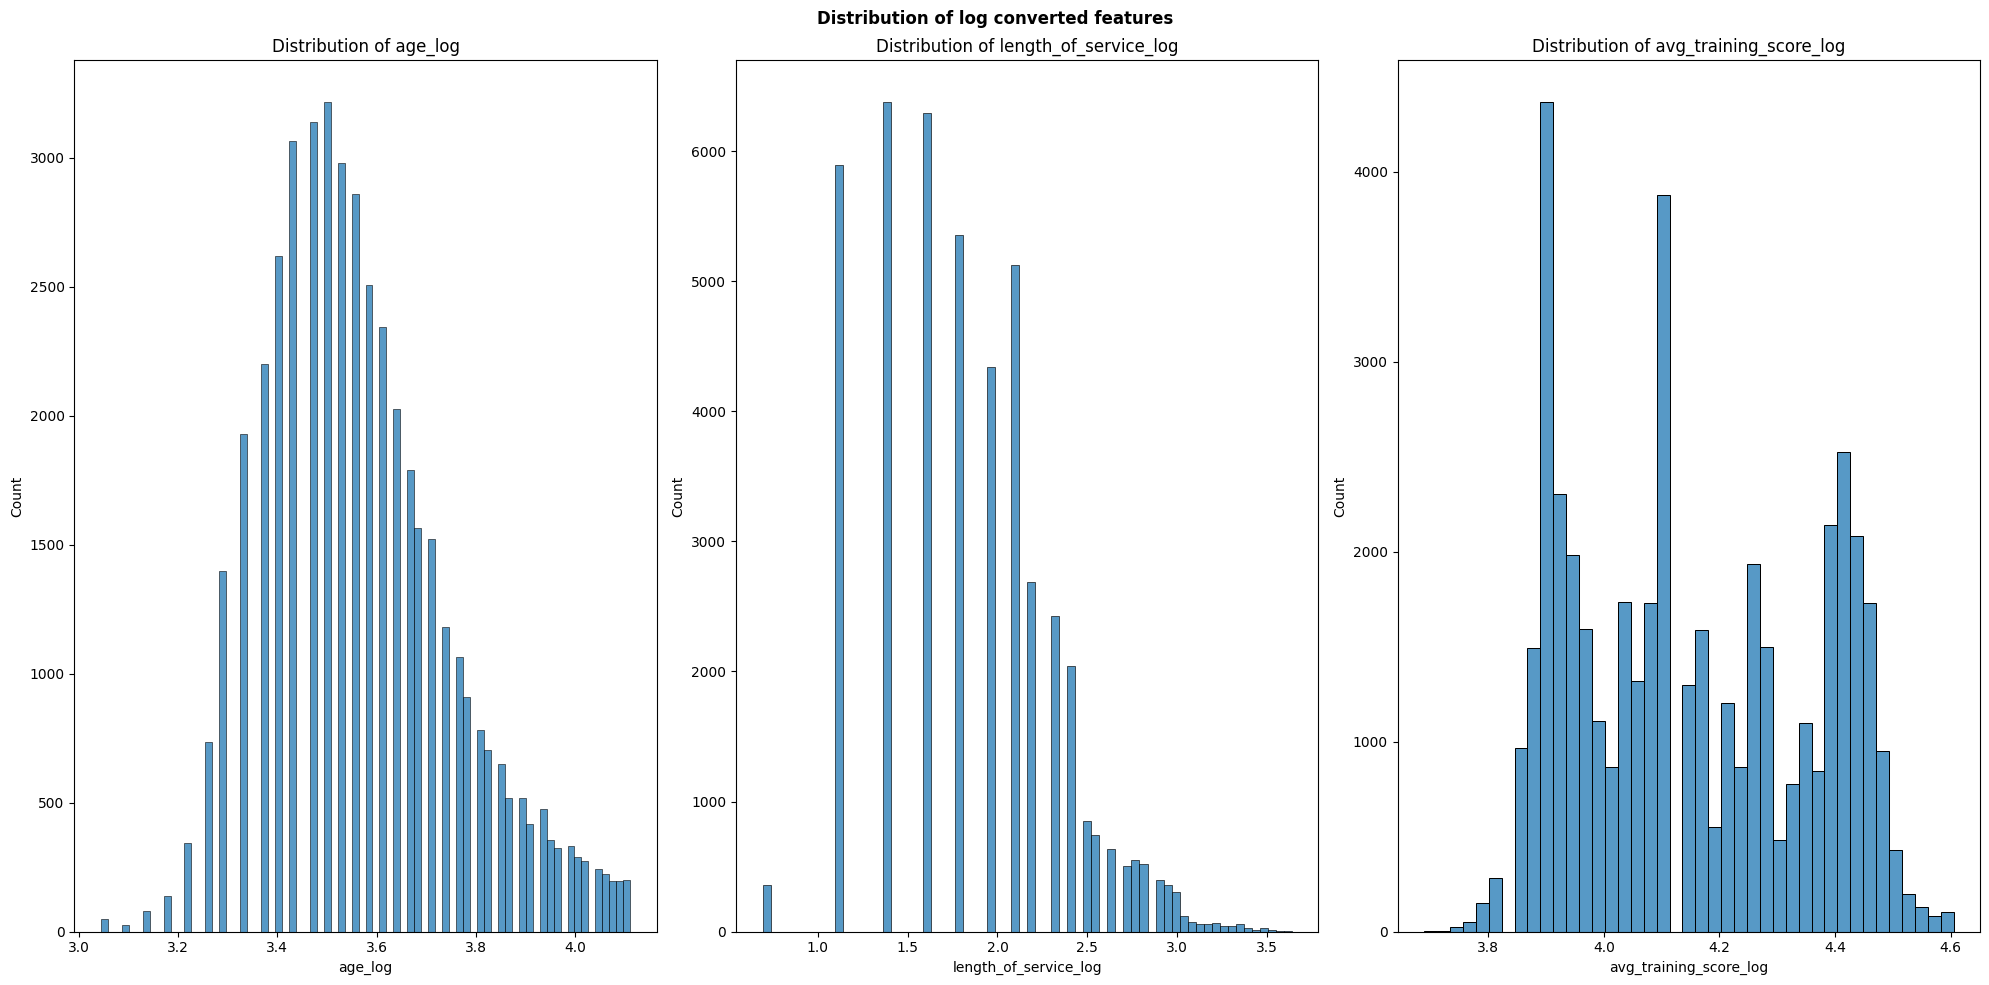

In [25]:
 log_columns = ['age_log', 'length_of_service_log', 'avg_training_score_log']

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))

sns.histplot(df['age_log'], ax=ax1)
ax1.set_title('Distribution of age_log')
sns.histplot(df['length_of_service_log'], ax=ax2)
ax2.set_title('Distribution of length_of_service_log')
sns.histplot(df['avg_training_score_log'], ax=ax3)
ax3.set_title('Distribution of avg_training_score_log')

plt.suptitle('Distribution of log converted features', fontweight='bold')
plt.tight_layout()
plt.show()

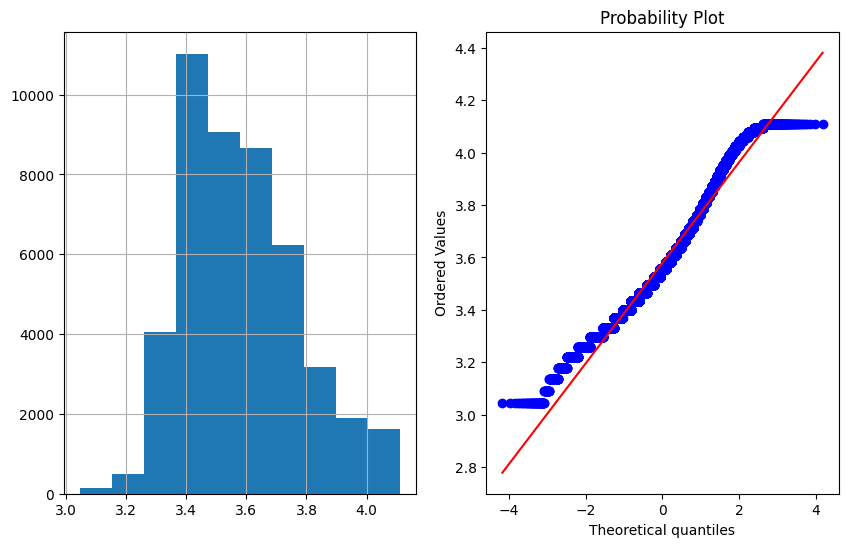

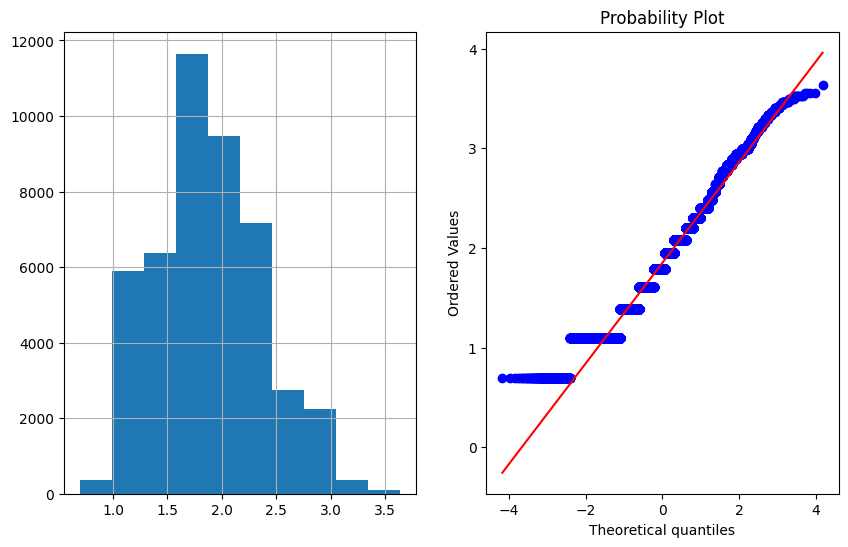

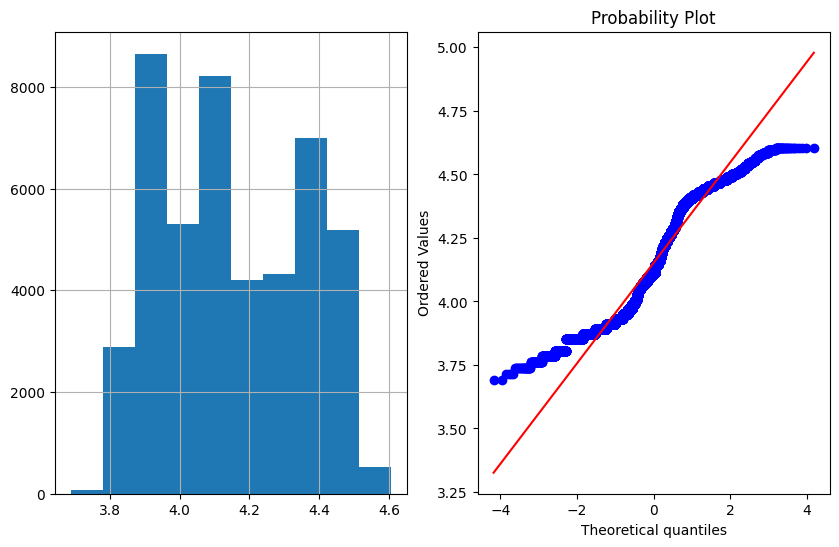

In [26]:
for feature in log_columns:
    plot_curve(df,feature)

Heat Map

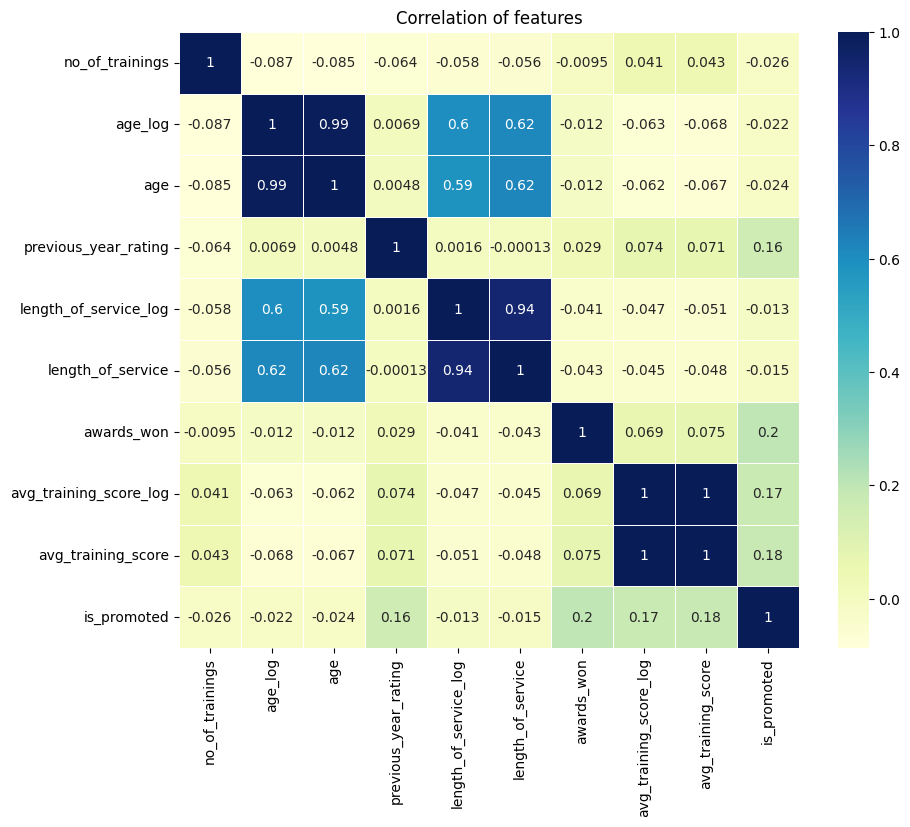

In [27]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr = numeric_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, linewidths=.5, cmap="YlGnBu")
plt.title('Correlation of features')
plt.show()

One hot encoded

In [28]:
df_encoded = pd.get_dummies(df)
df_encoded.head()

,no_of_trainings,age_log,age,previous_year_rating,length_of_service_log,length_of_service,awards_won,avg_training_score_log,avg_training_score,is_promoted,...,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,1,3.583519,35,5.0,2.197225,8,0,3.912023,49.0,0,...,False,False,False,False,True,True,False,False,False,True
1,1,3.433987,30,5.0,1.609438,4,0,4.110874,60.0,0,...,False,False,True,False,False,False,True,True,False,False
2,1,3.555348,34,3.0,2.079442,7,0,3.931826,50.0,0,...,False,False,True,False,False,False,True,False,False,True
3,2,3.688879,39,1.0,2.397895,10,0,3.931826,50.0,0,...,False,False,True,False,False,False,True,True,False,False
4,1,3.828641,45,3.0,1.098612,2,0,4.304065,73.0,0,...,False,False,True,False,False,False,True,True,False,False


Scaling Data

In [29]:
from sklearn.preprocessing import StandardScaler
features = np.array(df_encoded.columns).reshape(-1, 1)

for feature in features:
    scaler = StandardScaler()
    scaler.fit(df_encoded[feature])
    df_encoded[feature] = scaler.transform(df_encoded[feature])

df_encoded.head()

,no_of_trainings,age_log,age,previous_year_rating,length_of_service_log,length_of_service,awards_won,avg_training_score_log,avg_training_score,is_promoted,...,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,-0.418611,0.019377,-0.076052,1.324653,0.673784,0.402667,-0.155136,-1.177045,-1.111888,-0.310195,...,-0.109043,-0.083089,-1.474410,-0.09548,1.505848,1.518245,-1.518245,-1.117074,-0.146768,1.166064
1,-0.418611,-0.749600,-0.740379,1.324653,-0.474482,-0.549239,-0.155136,-0.202848,-0.292548,-0.310195,...,-0.109043,-0.083089,0.678237,-0.09548,-0.664078,-0.658655,0.658655,0.895195,-0.146768,-0.857586
2,-0.418611,-0.125493,-0.208918,-0.263965,0.443690,0.164690,-0.155136,-1.080029,-1.037403,-0.310195,...,-0.109043,-0.083089,0.678237,-0.09548,-0.664078,-0.658655,0.658655,-1.117074,-0.146768,1.166064
3,1.226184,0.561202,0.455409,-1.852582,1.065803,0.878619,-0.155136,-1.080029,-1.037403,-0.310195,...,-0.109043,-0.083089,0.678237,-0.09548,-0.664078,-0.658655,0.658655,0.895195,-0.146768,-0.857586
4,-0.418611,1.279937,1.252601,-0.263965,-1.472401,-1.025192,-0.155136,0.743621,0.675764,-0.310195,...,-0.109043,-0.083089,0.678237,-0.09548,-0.664078,-0.658655,0.658655,0.895195,-0.146768,-0.857586


Splitting Data

In [30]:
x = df_encoded.drop(columns=['is_promoted'], inplace=False)
y = df_encoded['is_promoted'].astype(int)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=11)

In [32]:
print('Shape of X_train: ', X_train.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

Shape of X_train:  (37104, 60)
Shape of X_test:  (9276, 60)
Shape of y_train:  (37104,)
Shape of y_test:  (9276,)


Model development
### We will use the following models in this project:
- Decison Tree Classifier
- Random Forest Classifer
- Logistic Regression

In [33]:
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, confusion_matrix, f1_score, precision_recall_curve, roc_curve, RocCurveDisplay, PrecisionRecallDisplay

In [34]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    """
    Evaluate the performance of a classifier and print various metrics.

    Parameters:
    y_test (array-like): True labels.
    pred (array-like): Predicted labels.
    pred_proba (array-like): Predicted probabilities.

    Returns:
    None
    """
    # Calculate confusion matrix
    confusion = confusion_matrix(y_test, pred)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, pred)

    # Calculate precision
    precision = precision_score(y_test, pred, average="macro")

    # Calculate recall
    recall = recall_score(y_test, pred, average="macro")

    # Calculate F1 score
    f1 = f1_score(y_test, pred, average="macro")

    # Calculate ROC AUC score
    if pred_proba is not None:
        roc_auc = roc_auc_score(y_test, pred_proba, average="macro")
    else:
        roc_auc = 'N/A'  # Handle case where pred_proba is not provided

    # Print confusion matrix
    print('Confusion Matrix')
    print(confusion)

    # Print evaluation metrics
    print('Accuracy: {0:.4f}, Precision: {1:.4f}, Recall: {2:.4f}, F1: {3:.4f}, AUC: {4}'.format(accuracy, precision, recall, f1, roc_auc))

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

DT

In [36]:
dt_clf = DecisionTreeClassifier()

In [37]:
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
dt_pred_proba = dt_clf.predict_proba(X_test)[:, 1]

The result is stored in dt_pred_proba, which is an array of probabilities indicating the confidence of the classifier in predicting the positive class.

In [38]:
get_clf_eval(y_test, dt_pred, dt_pred_proba)

Confusion Matrix
[[7875  598]
 [ 431  372]]
Accuracy: 0.8891, Precision: 0.6658, Recall: 0.6963, F1: 0.6792, AUC: 0.6962161250909232


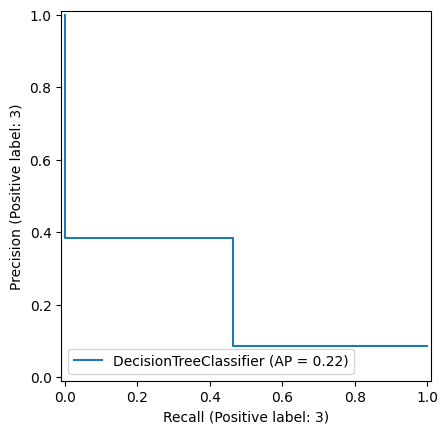

In [39]:
from sklearn.metrics import PrecisionRecallDisplay

PrecisionRecallDisplay.from_estimator(dt_clf, X_test, y_test)

plt.show()

LR

In [40]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:, 1]
get_clf_eval(y_test, lr_pred, lr_pred_proba)

Confusion Matrix
[[8458   15]
 [ 515  288]]
Accuracy: 0.9429, Precision: 0.9466, Recall: 0.6784, F1: 0.7452, AUC: 0.8070802588957762


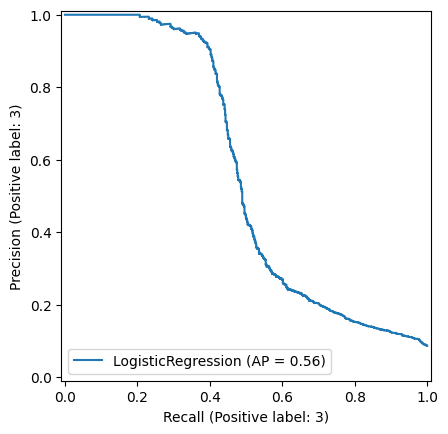

In [41]:
PrecisionRecallDisplay.from_estimator(lr_clf, X_test, y_test)

RF

In [42]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
rf_pred_proba = rf_clf.predict_proba(X_test)[:, 1]
get_clf_eval(y_test, rf_pred, rf_pred_proba)

Confusion Matrix
[[8447   26]
 [ 507  296]]
Accuracy: 0.9425, Precision: 0.9313, Recall: 0.6828, F1: 0.7478, AUC: 0.7991429519215605


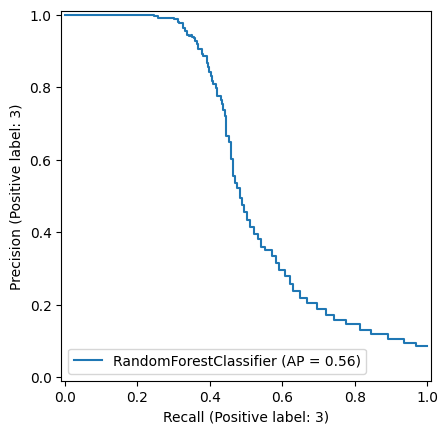

In [43]:
PrecisionRecallDisplay.from_estimator(rf_clf, X_test, y_test)

Using AutoML :
### EvalML is an open-source AutoML library written in python that automates a large part of the machine learning process and we can easily evaluate which machine learning pipeline works better for the given set of data.

In [44]:
evalml.problem_types.ProblemTypes.all_problem_types

[<ProblemTypes.BINARY: 'binary'>,
 <ProblemTypes.MULTICLASS: 'multiclass'>,
 <ProblemTypes.REGRESSION: 'regression'>,
 <ProblemTypes.TIME_SERIES_REGRESSION: 'time series regression'>,
 <ProblemTypes.TIME_SERIES_BINARY: 'time series binary'>,
 <ProblemTypes.TIME_SERIES_MULTICLASS: 'time series multiclass'>,
 <ProblemTypes.MULTISERIES_TIME_SERIES_REGRESSION: 'multiseries time series regression'>]

In [45]:
X_train, X_test, y_train, y_test = evalml.preprocessing.split_data(x, y, problem_type='binary')

Running AutoML to select the best algorithm

In [46]:
from evalml.automl import AutoMLSearch
automl = AutoMLSearch(X_train=X_train, y_train=y_train, problem_type='binary')
automl.search()

{1: {'Random Forest Classifier w/ Label Encoder + Imputer + Undersampler + RF Classifier Select From Model': 12.936597347259521,
  'Total time of batch': 13.105842590332031},
 2: {'LightGBM Classifier w/ Label Encoder + Imputer + Undersampler + Select Columns Transformer': 4.1171875,
  'Extra Trees Classifier w/ Label Encoder + Imputer + Undersampler + Select Columns Transformer': 5.131397485733032,
  'Elastic Net Classifier w/ Label Encoder + Imputer + Undersampler + Standard Scaler + Select Columns Transformer': 7.9852821826934814,
  'XGBoost Classifier w/ Label Encoder + Imputer + Undersampler + Select Columns Transformer': 3.910151481628418,
  'Logistic Regression Classifier w/ Label Encoder + Imputer + Undersampler + Standard Scaler + Select Columns Transformer': 10.403360366821289,
  'Total time of batch': 32.4444842338562}}

In [47]:
automl.rankings

,id,pipeline_name,search_order,ranking_score,mean_cv_score,standard_deviation_cv_score,percent_better_than_baseline,high_variance_cv,parameters
0,2,LightGBM Classifier w/ Label Encoder + Imputer...,2,0.241047,0.241047,0.000376,92.381397,False,"{'Label Encoder': {'positive_label': None}, 'I..."
1,5,XGBoost Classifier w/ Label Encoder + Imputer ...,5,0.241756,0.241756,0.001049,92.358967,False,"{'Label Encoder': {'positive_label': None}, 'I..."
2,6,Logistic Regression Classifier w/ Label Encode...,6,0.269068,0.269068,0.001432,91.495741,False,"{'Label Encoder': {'positive_label': None}, 'I..."
3,4,Elastic Net Classifier w/ Label Encoder + Impu...,4,0.269071,0.269071,0.001417,91.495645,False,"{'Label Encoder': {'positive_label': None}, 'I..."
4,1,Random Forest Classifier w/ Label Encoder + Im...,1,0.284748,0.284748,0.001138,91.000146,False,"{'Label Encoder': {'positive_label': None}, 'I..."
5,3,Extra Trees Classifier w/ Label Encoder + Impu...,3,0.294686,0.294686,0.001131,90.686047,False,"{'Label Encoder': {'positive_label': None}, 'I..."
6,0,Mode Baseline Binary Classification Pipeline,0,3.163922,3.163922,0.001683,0.000000,False,"{'Label Encoder': {'positive_label': None}, 'B..."


In [48]:
automl.best_pipeline
best_pipeline=automl.best_pipeline

In [49]:
automl.describe_pipeline(automl.rankings.iloc[0]["id"])


**********************************************************************************************


INFO:evalml.pipelines.pipeline_base.describe:
**********************************************************************************************


* LightGBM Classifier w/ Label Encoder + Imputer + Undersampler + Select Columns Transformer *


INFO:evalml.pipelines.pipeline_base.describe:* LightGBM Classifier w/ Label Encoder + Imputer + Undersampler + Select Columns Transformer *


**********************************************************************************************


INFO:evalml.pipelines.pipeline_base.describe:**********************************************************************************************


INFO:evalml.pipelines.pipeline_base.describe:


Problem Type: binary


INFO:evalml.pipelines.pipeline_base.describe:Problem Type: binary


Model Family: LightGBM


INFO:evalml.pipelines.pipeline_base.describe:Model Family: LightGBM


INFO:evalml.pipelines.pipeline_base.describe:


Pipeline Steps


INFO:evalml.pipelines.pipeline_base.describe:Pipeline Steps


INFO:evalml.pipelines.pipeline_base.describe:==============


1. Label Encoder


INFO:evalml.pipelines.component_graph.describe:1. Label Encoder


	 * positive_label : None


INFO:evalml.pipelines.components.component_base.describe:	 * positive_label : None


2. Imputer


INFO:evalml.pipelines.component_graph.describe:2. Imputer


	 * categorical_impute_strategy : most_frequent


INFO:evalml.pipelines.components.component_base.describe:	 * categorical_impute_strategy : most_frequent


	 * numeric_impute_strategy : mean


INFO:evalml.pipelines.components.component_base.describe:	 * numeric_impute_strategy : mean


	 * boolean_impute_strategy : most_frequent


INFO:evalml.pipelines.components.component_base.describe:	 * boolean_impute_strategy : most_frequent


	 * categorical_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * categorical_fill_value : None


	 * numeric_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * numeric_fill_value : None


	 * boolean_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * boolean_fill_value : None


3. Undersampler


INFO:evalml.pipelines.component_graph.describe:3. Undersampler


	 * sampling_ratio : 0.25


INFO:evalml.pipelines.components.component_base.describe:	 * sampling_ratio : 0.25


	 * min_samples : 100


INFO:evalml.pipelines.components.component_base.describe:	 * min_samples : 100


	 * min_percentage : 0.1


INFO:evalml.pipelines.components.component_base.describe:	 * min_percentage : 0.1


	 * sampling_ratio_dict : None


INFO:evalml.pipelines.components.component_base.describe:	 * sampling_ratio_dict : None


4. Select Columns Transformer


INFO:evalml.pipelines.component_graph.describe:4. Select Columns Transformer


	 * columns : ['no_of_trainings', 'age_log', 'age', 'previous_year_rating', 'length_of_service_log', 'length_of_service', 'awards_won', 'avg_training_score_log', 'avg_training_score', 'department_Analytics', 'department_Finance', 'department_Operations', 'department_Procurement', 'department_Sales & Marketing', 'department_Technology', 'region_region_13', 'region_region_15', 'region_region_2', 'region_region_22', 'region_region_26', 'region_region_27', 'region_region_28', 'region_region_4', 'region_region_7', "education_Bachelor's", "education_Master's & above", 'gender_f', 'gender_m', 'recruitment_channel_other', 'recruitment_channel_sourcing']


INFO:evalml.pipelines.components.component_base.describe:	 * columns : ['no_of_trainings', 'age_log', 'age', 'previous_year_rating', 'length_of_service_log', 'length_of_service', 'awards_won', 'avg_training_score_log', 'avg_training_score', 'department_Analytics', 'department_Finance', 'department_Operations', 'department_Procurement', 'department_Sales & Marketing', 'department_Technology', 'region_region_13', 'region_region_15', 'region_region_2', 'region_region_22', 'region_region_26', 'region_region_27', 'region_region_28', 'region_region_4', 'region_region_7', "education_Bachelor's", "education_Master's & above", 'gender_f', 'gender_m', 'recruitment_channel_other', 'recruitment_channel_sourcing']


5. LightGBM Classifier


INFO:evalml.pipelines.component_graph.describe:5. LightGBM Classifier


	 * boosting_type : gbdt


INFO:evalml.pipelines.components.component_base.describe:	 * boosting_type : gbdt


	 * learning_rate : 0.1


INFO:evalml.pipelines.components.component_base.describe:	 * learning_rate : 0.1


	 * n_estimators : 100


INFO:evalml.pipelines.components.component_base.describe:	 * n_estimators : 100


	 * max_depth : 0


INFO:evalml.pipelines.components.component_base.describe:	 * max_depth : 0


	 * num_leaves : 31


INFO:evalml.pipelines.components.component_base.describe:	 * num_leaves : 31


	 * min_child_samples : 20


INFO:evalml.pipelines.components.component_base.describe:	 * min_child_samples : 20


	 * n_jobs : -1


INFO:evalml.pipelines.components.component_base.describe:	 * n_jobs : -1


	 * bagging_freq : 0


INFO:evalml.pipelines.components.component_base.describe:	 * bagging_freq : 0


	 * bagging_fraction : 0.9


INFO:evalml.pipelines.components.component_base.describe:	 * bagging_fraction : 0.9


	 * verbose : -1


INFO:evalml.pipelines.components.component_base.describe:	 * verbose : -1


INFO:evalml.automl.automl_search.describe_pipeline:


Training


INFO:evalml.automl.automl_search.describe_pipeline:Training


INFO:evalml.automl.automl_search.describe_pipeline:========


Training for binary problems.


INFO:evalml.automl.automl_search.describe_pipeline:Training for binary problems.


Total training time (including CV): 4.1 seconds


INFO:evalml.automl.automl_search.describe_pipeline:Total training time (including CV): 4.1 seconds


INFO:evalml.automl.automl_search.describe_pipeline:


Cross Validation


INFO:evalml.automl.automl_search.describe_pipeline:Cross Validation


----------------


INFO:evalml.automl.automl_search.describe_pipeline:----------------


             Log Loss Binary  MCC Binary  Gini   AUC  Precision    F1  Balanced Accuracy Binary  Accuracy Binary # Training # Validation
0                      0.241       0.511 0.629 0.814      0.739 0.516                     0.691            0.935     24,736       12,368
1                      0.241       0.532 0.602 0.801      0.883 0.499                     0.672            0.939     24,736       12,368
2                      0.241       0.481 0.627 0.813      0.663 0.499                     0.690            0.929     24,736       12,368
mean                   0.241       0.508 0.619 0.810      0.762 0.505                     0.685            0.934          -            -
std                    0.000       0.026 0.015 0.008      0.112 0.010                     0.011            0.005          -            -
coef of var            0.002       0.050 0.024 0.009      0.147 0.019                     0.016            0.005          -            -


INFO:evalml.automl.automl_search.describe_pipeline:             Log Loss Binary  MCC Binary  Gini   AUC  Precision    F1  Balanced Accuracy Binary  Accuracy Binary # Training # Validation
0                      0.241       0.511 0.629 0.814      0.739 0.516                     0.691            0.935     24,736       12,368
1                      0.241       0.532 0.602 0.801      0.883 0.499                     0.672            0.939     24,736       12,368
2                      0.241       0.481 0.627 0.813      0.663 0.499                     0.690            0.929     24,736       12,368
mean                   0.241       0.508 0.619 0.810      0.762 0.505                     0.685            0.934          -            -
std                    0.000       0.026 0.015 0.008      0.112 0.010                     0.011            0.005          -            -
coef of var            0.002       0.050 0.024 0.009      0.147 0.019                     0.016            0.005          -    

Predicting the results

In [50]:
evalml.objectives.get_all_objective_names()

['expvariance',
 'maxerror',
 'medianae',
 'mse',
 'mae',
 'r2',
 'mean squared log error',
 'root mean squared log error',
 'root mean squared error',
 'symmetric mean absolute percentage error',
 'mean absolute percentage error',
 'mean absolute scaled error',
 'mcc multiclass',
 'log loss multiclass',
 'auc weighted',
 'auc macro',
 'auc micro',
 'recall weighted',
 'recall macro',
 'recall micro',
 'precision weighted',
 'precision macro',
 'precision micro',
 'f1 weighted',
 'f1 macro',
 'f1 micro',
 'balanced accuracy multiclass',
 'accuracy multiclass',
 'mcc binary',
 'log loss binary',
 'gini',
 'auc',
 'recall',
 'precision',
 'f1',
 'balanced accuracy binary',
 'accuracy binary',
 'sensitivity at low alert rates',
 'lead scoring',
 'fraud cost',
 'cost benefit matrix']

In [51]:
best_pipeline.score(X_test, y_test,objectives=["accuracy binary"])

OrderedDict([('Accuracy Binary', 0.9385510996119016)])

Saving the model to pickle file

In [52]:
best_pipeline.save("model.pkl")
final_model=automl.load('model.pkl')

In [53]:
pred=final_model.predict(X_test)

In [54]:
pred

48001    0
18632    0
49972    0
54789    0
44445    0
        ..
22244    0
9130     0
13084    0
48175    0
51877    0
Name: is_promoted, Length: 9276, dtype: int64

In [55]:
y_test

48001    0
18632    0
49972    0
54789    0
44445    0
        ..
22244    0
9130     0
13084    0
48175    0
51877    0
Name: is_promoted, Length: 9276, dtype: int64